In [1]:
## Prediction using Unsupervised ML
##  ● From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually. 

## Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [3]:
## Importing the dataset
iris_data = pd.read_csv('C:\\Users\\Niks PC\\Desktop\\Spark Foundation\\Iris.csv')

## Dropping the id column
iris_data.drop(['Id'],axis= 1,inplace=True)

iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa


In [4]:
## Checking for the outliers
## plotting the box plot

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalLengthCm'>

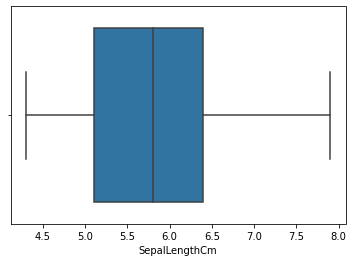

In [5]:
sns.boxplot(iris_data.SepalLengthCm)  ## NO Outliers

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SepalWidthCm'>

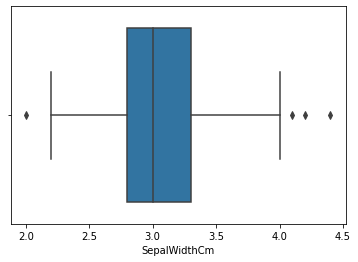

In [6]:
sns.boxplot(iris_data.SepalWidthCm)   ## Outliers are present

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalLengthCm'>

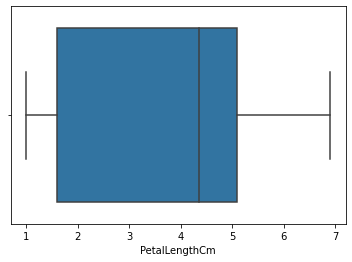

In [7]:
sns.boxplot(iris_data.PetalLengthCm)  ## NO Outliers

C:\Users\Niks PC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PetalWidthCm'>

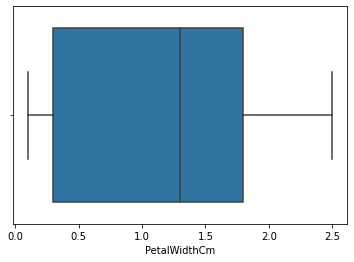

In [8]:
sns.boxplot(iris_data.PetalWidthCm)   ## NO outliers

In [9]:
## Using winsorization technique for outlier treatment
from feature_engine.outliers import Winsorizer

winsor = Winsorizer(capping_method='iqr', tail='both',fold=1.5,variables=['SepalWidthCm'])

iris_data['SepalWidthCm'] = winsor.fit_transform(iris_data[['SepalWidthCm']])

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Count'>

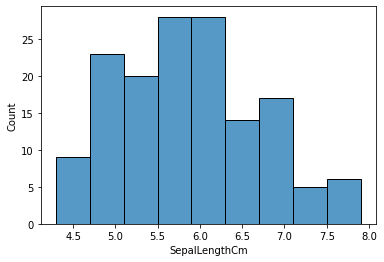

In [10]:
## Checking for the distribution of data points by plotting the histograms

sns.histplot(iris_data.SepalLengthCm) 

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Count'>

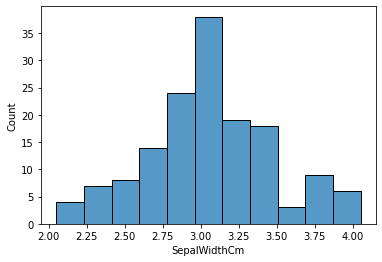

In [11]:
sns.histplot(iris_data.SepalWidthCm)   

<AxesSubplot:xlabel='PetalLengthCm', ylabel='Count'>

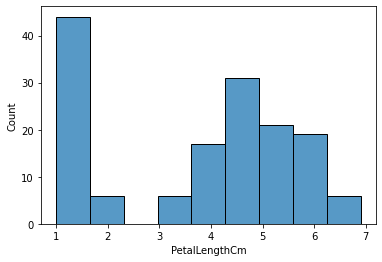

In [12]:
sns.histplot(iris_data.PetalLengthCm)  

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

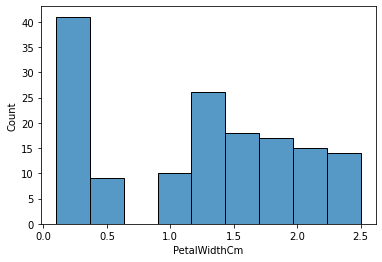

In [13]:
sns.histplot(iris_data.PetalWidthCm)

In [14]:
## Describing the dataset
iris_data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.050667,3.758667,1.198667
std,0.828066,0.423036,1.764420,0.763161
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [17]:
## Model building
## Using K-means Clustering

## Importing the necessary library
from sklearn.cluster import	KMeans

In [18]:
## Considering numerical part of the dataset
iris_data1 = iris_data.iloc[:, 0:4]

In [19]:
###### scree plot or elbow curve ############
TWSS = []
k = list(range(2, 9))

for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(iris_data1)
    TWSS.append(kmeans.inertia_)

Text(0, 0.5, 'total_within_SS')

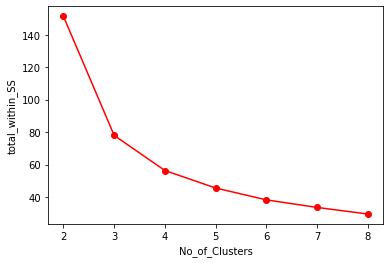

In [20]:
# Scree plot 
plt.plot(k, TWSS, 'ro-')
plt.xlabel("No_of_Clusters")
plt.ylabel("total_within_SS")

In [21]:
# Selecting 3 clusters from the above scree plot which is the optimum number of clusters 
model = KMeans(n_clusters = 3)
model.fit(iris_data1)

KMeans(n_clusters=3)

In [22]:
model.labels_ # getting the labels of clusters assigned to each row 
mb = pd.Series(model.labels_)  # converting numpy array into pandas series object

In [24]:
## Creating new column in the iris dataset 
iris_data['clust'] = mb

iris_data.head(7)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,clust
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
5,5.4,3.9,1.7,0.4,Iris-setosa,1
6,4.6,3.4,1.4,0.3,Iris-setosa,1


In [25]:
## rearranging the column
iris_data.iloc[:, [5,0,1,2,3,4]]
iris_data.groupby(iris_data.clust).mean()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
clust,,,,
0,5.901613,2.749194,4.393548,1.433871
1,5.006000,3.407000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


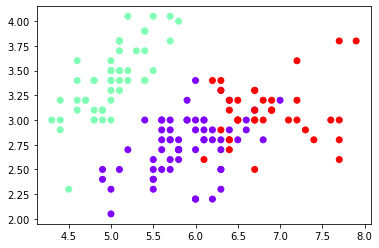

In [26]:
## Plotting the clusters
plt.scatter(iris_data.SepalLengthCm, iris_data.SepalWidthCm,c=model.labels_,cmap='rainbow')